```
//
// ********************************************************************
// * License and Disclaimer                                           *
// *                                                                  *
// * The  Geant4 software  is  copyright of the Copyright Holders  of *
// * the Geant4 Collaboration.  It is provided  under  the terms  and *
// * conditions of the Geant4 Software License,  included in the file *
// * LICENSE and available at  http://cern.ch/geant4/license .  These *
// * include a list of copyright holders.                             *
// *                                                                  *
// * Neither the authors of this software system, nor their employing *
// * institutes,nor the agencies providing financial support for this *
// * work  make  any representation or  warranty, express or implied, *
// * regarding  this  software system or assume any liability for its *
// * use.  Please see the license in the file  LICENSE  and URL above *
// * for the full disclaimer and the limitation of liability.         *
// *                                                                  *
// * This  code  implementation is the result of  the  scientific and *
// * technical work of the GEANT4 collaboration.                      *
// * By using,  copying,  modifying or  distributing the software (or *
// * any work based  on the software)  you  agree  to acknowledge its *
// * use  in  resulting  scientific  publications,  and indicate your *
// * acceptance of all terms of the Geant4 Software license.          *
// ********************************************************************
//
// The `molcounters` example(s) are provided as part of Geant4-DNA
// and any report or published result obtained using it shall cite
// the respective Geant4-DNA collaboration publications.
//
// Reports or results obtained using the spatially-aware `MoleculeCounter`
// provided in this example, shall further cite:
//
// Velten & Tomé, Radiation Physics and Chemistry, 2023 (10.1016/j.radphyschem.2023.111194)
//
//
// Author: Christian Velten (2025)
//
```

In [ ]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uproot
from pprint import pprint

In [2]:
mpl.rcParams['font.size'] = 9

In [3]:
path = '~/build/geant4/geant4/examples/molcounters/sdcounters'
tfile = uproot.open(os.path.join(path, 'MoleculeCounters.root'))

print('TTrees:')
pprint(list(tfile))
print('')

for tree in tfile:
    ttree = tfile[tree]
    print(f'Branches in Tree `{tree}`')
    pprint(list(ttree))
    print('')

TTrees:
['BasicMoleculeCount_BasicCounter;1',
 'BasicMoleculeCount_BasicCounter_VariablePrecision;1',
 'BasicReactionCount_Reactions;1']

Branches in Tree `BasicMoleculeCount_BasicCounter;1`
[<TBranch 'Time__ps_' at 0x0001581fb6b0>,
 <TBranch 'Molecule_Count' at 0x0001581fb710>,
 <TBranch 'Molecule_Name' at 0x000158404bc0>]

Branches in Tree `BasicMoleculeCount_BasicCounter_VariablePrecision;1`
[<TBranch 'Time__ps_' at 0x000158405ac0>,
 <TBranch 'Molecule_Count' at 0x000158405b20>,
 <TBranch 'Molecule_Name' at 0x000158406db0>]

Branches in Tree `BasicReactionCount_Reactions;1`
[<TBranch 'Time__ps_' at 0x000158407da0>,
 <TBranch 'Reaction_Count' at 0x000158407e00>,
 <TBranch 'Reaction_Name' at 0x000158419100>]



In [4]:
# Convert TTree to pd.DataFrame
basic_molecule_count = tfile['BasicMoleculeCount_BasicCounter'].arrays(library='pd')
basic_molecule_count_variable = tfile['BasicMoleculeCount_BasicCounter_VariablePrecision'].arrays(library='pd')
basic_reaction_count = tfile['BasicReactionCount_Reactions'].arrays(library='pd')

# Fix dtype from awkward to str:
for df in (basic_molecule_count, basic_molecule_count_variable, basic_reaction_count):
    for col, dtype in zip(df.columns, df.dtypes):
        if dtype == 'awkward':
            df[col] = df[col].astype(str)

# The reaction count is cumulative, so we'll calculate the differential
basic_reaction_count['Reaction_Count_Differential'] = \
    pd.concat([ser.Reaction_Count.diff()
              for _, ser in basic_reaction_count.groupby('Reaction_Name')])

print('Example DataFrame:')
pprint(basic_molecule_count)
pprint(basic_reaction_count)

Example DataFrame:
          Time__ps_  Molecule_Count Molecule_Name
0          1.000000        166626.0         H3O^1
1          1.325711        166609.0         H3O^1
2          1.757511        166589.0         H3O^1
3          2.329952        166542.0         H3O^1
4          3.088844        166503.0         H3O^1
..              ...             ...           ...
345   323745.754282          7371.0          °O^0
346   429193.426013          7371.0          °O^0
347   568986.602902          7371.0          °O^0
348   754312.006335          7371.0          °O^0
349  1000000.000000          7371.0          °O^0

[350 rows x 3 columns]
          Time__ps_  Reaction_Count                  Reaction_Name  \
0          1.000000           685.0                    H + H -> H2   
1          1.325711           686.0                    H + H -> H2   
2          1.757511           686.0                    H + H -> H2   
3          2.329952           688.0                    H + H -> H2   
4      

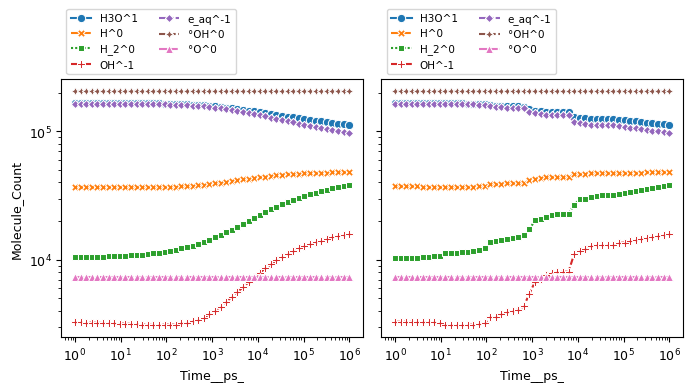

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2,
                               figsize=(7, 4),
                               sharex=True, sharey=True)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
# ax1.set_xlim()

sns.lineplot(data=basic_molecule_count,
             x='Time__ps_',
             y='Molecule_Count',
             hue='Molecule_Name',
             markers=True, style='Molecule_Name',
             ax=ax1)
ax1.legend(ncols=2, fontsize='small', loc='lower left', bbox_to_anchor=(0, 1))

sns.lineplot(data=basic_molecule_count_variable,
             x='Time__ps_',
             y='Molecule_Count',
             hue='Molecule_Name',
             markers=True, style='Molecule_Name',
             ax=ax2,
             legend=True)
ax2.legend(ncols=2, fontsize='small', loc='lower left', bbox_to_anchor=(0, 1))

fig.tight_layout()

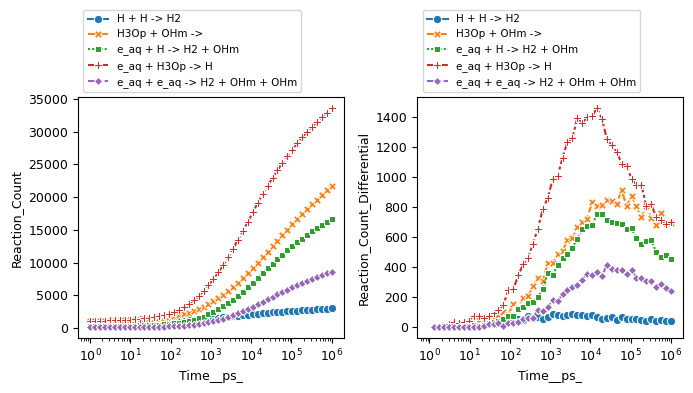

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2,
                               figsize=(7, 4),
                               sharex=True)

ax1.set_xscale('log')

sns.lineplot(data=basic_reaction_count,
             x='Time__ps_',
             y='Reaction_Count',
             hue='Reaction_Name',
             markers=True, style='Reaction_Name',
             ax=ax1,
             legend=True,)
ax1.legend(ncols=1, fontsize='small', loc='lower left', bbox_to_anchor=(0, 1))

sns.lineplot(data=basic_reaction_count,
             x='Time__ps_',
             y='Reaction_Count_Differential',
             hue='Reaction_Name',
             markers=True, style='Reaction_Name',
             ax=ax2,
             legend=True)
ax2.legend(ncols=1, fontsize='small', loc='lower left', bbox_to_anchor=(0, 1))

fig.tight_layout()